In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("data.csv")

In [20]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [21]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [22]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [2]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


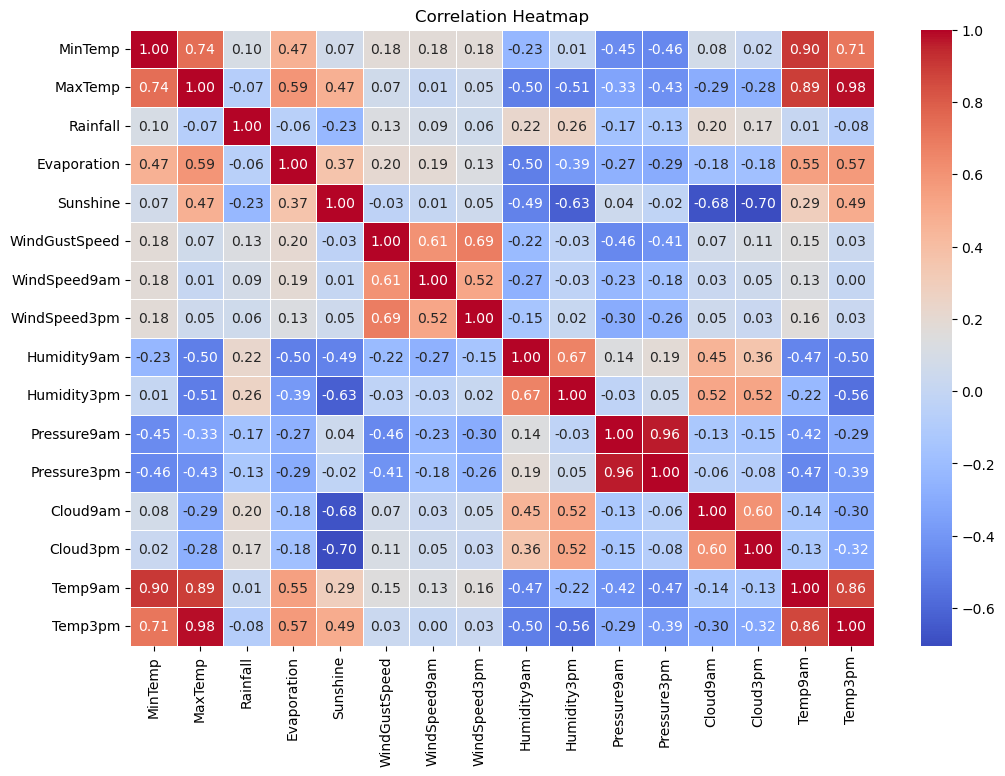

In [5]:
correlation_matrix = df.corr()
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [25]:
data=df

In [26]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# 1_mean_mode

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Day_of_week'] = data['Date'].dt.dayofweek

data.drop(columns=['Date'], inplace=True)

In [30]:
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',]
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

In [31]:
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

In [32]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
Day_of_week      0
dtype: int64

In [33]:
data = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [34]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,1,0
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,1,0
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,1,0,1,0
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
data.to_csv("1_data.csv")

In [36]:
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Descision tree

In [38]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred_dt = decision_tree.predict(X_test)

In [40]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.785645538292314


# Random forest

In [41]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf = random_forest.predict(X_test)

In [43]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8511274577203355


# Bagging

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'n_estimators': [50, 100],    
    'max_depth': [None, 10],         
    'min_samples_split': [2, 5],    
    'min_samples_leaf': [1, 2]       
}

In [46]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)

In [47]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [48]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [49]:
y_pred = best_model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")

Best Model Accuracy: 0.8513336999862505


# 2_Interpolate

In [99]:
data1=pd.read_csv('data.csv')

In [100]:
data1.set_index('Date', inplace=True)
data1 = data.interpolate(method='linear')

In [103]:
data1.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation       6049
Sunshine          6049
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             2
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Day                  0
Month                0
Year                 0
Day_of_week          0
dtype: int64

In [104]:
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',]
data1[numeric_features] = data1[numeric_features].fillna(data1[numeric_features].mean())

In [105]:
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']
data1[categorical_features] = data1[categorical_features].fillna(data1[categorical_features].mode().iloc[0])

In [110]:
data1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
Day_of_week      0
dtype: int64

In [111]:
data1 = pd.get_dummies(data1, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [112]:
X = data1.drop(columns=['RainTomorrow'])
y = data1['RainTomorrow']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Descision tree

In [114]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.784786195517668


# Random forest

In [116]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8500274989687887


# 3_Imputer

In [69]:
data2=pd.read_csv('data.csv')

In [71]:
data2['Date'] = pd.to_datetime(data2['Date'])

data2['Day'] = data2['Date'].dt.day
data2['Month'] = data2['Date'].dt.month
data2['Year'] = data2['Date'].dt.year
data2['Day_of_week'] = data2['Date'].dt.dayofweek

data2.drop(columns=['Date'], inplace=True)

In [72]:
data2 = pd.get_dummies(data2, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [85]:
X = data2.drop(columns=['RainTomorrow'])
y = data2['RainTomorrow']

In [75]:
imputer = IterativeImputer(max_iter=10, random_state=42,verbose=2,tol=1e-5)

In [76]:
X_imputed = imputer.fit_transform(X)

[IterativeImputer] Completing matrix with shape (145460, 119)
[IterativeImputer] Ending imputation round 1/10, elapsed time 74.67
[IterativeImputer] Change: 154.01429048281784, scaled tolerance: 0.02017 
[IterativeImputer] Ending imputation round 2/10, elapsed time 149.58
[IterativeImputer] Change: 92.65871582734954, scaled tolerance: 0.02017 
[IterativeImputer] Ending imputation round 3/10, elapsed time 224.75
[IterativeImputer] Change: 42.95217829827466, scaled tolerance: 0.02017 
[IterativeImputer] Ending imputation round 4/10, elapsed time 311.08
[IterativeImputer] Change: 21.399908768139728, scaled tolerance: 0.02017 
[IterativeImputer] Ending imputation round 5/10, elapsed time 400.23
[IterativeImputer] Change: 11.52789125186915, scaled tolerance: 0.02017 
[IterativeImputer] Ending imputation round 6/10, elapsed time 481.63
[IterativeImputer] Change: 8.459234230517175, scaled tolerance: 0.02017 
[IterativeImputer] Ending imputation round 7/10, elapsed time 558.30
[IterativeImpute

C:\Users\Dhiyanesh\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [86]:
X = pd.DataFrame(X_imputed, columns=X.columns)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.900000,0.6,4.744523,6.889277,44.000000,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,7.4,25.100000,0.0,5.376076,10.816271,44.000000,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,12.9,25.700000,0.0,7.963779,11.819374,46.000000,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,9.2,28.000000,0.0,6.397383,12.208848,24.000000,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17.5,32.300000,1.0,6.289210,5.523715,41.000000,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.181765,10.772587,31.000000,13.0,11.0,51.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,3.6,25.300000,0.0,4.571748,10.394177,22.000000,13.0,9.0,56.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,5.4,26.900000,0.0,5.444222,9.758739,37.000000,9.0,9.0,53.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
145458,7.8,27.000000,0.0,6.373523,10.718631,28.000000,13.0,7.0,51.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
data2=X
data2['RainTomorrow']=y
data2.to_csv('2_imputed.csv')
data2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
0,13.4,22.900000,0.6,4.744523,6.889277,44.000000,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,No
1,7.4,25.100000,0.0,5.376076,10.816271,44.000000,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,No
2,12.9,25.700000,0.0,7.963779,11.819374,46.000000,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,No
3,9.2,28.000000,0.0,6.397383,12.208848,24.000000,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
4,17.5,32.300000,1.0,6.289210,5.523715,41.000000,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.181765,10.772587,31.000000,13.0,11.0,51.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
145456,3.6,25.300000,0.0,4.571748,10.394177,22.000000,13.0,9.0,56.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
145457,5.4,26.900000,0.0,5.444222,9.758739,37.000000,9.0,9.0,53.0,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,No
145458,7.8,27.000000,0.0,6.373523,10.718631,28.000000,13.0,7.0,51.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No


In [90]:
data2.isna().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
                  ... 
WindDir3pm_WNW       0
WindDir3pm_WSW       0
RainToday_No         0
RainToday_Yes        0
RainTomorrow      3267
Length: 120, dtype: int64

In [91]:
data2.dropna(subset=['RainTomorrow'], inplace=True)

In [92]:
data.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Day                  0
Month                0
Year                 0
Day_of_week          0
dtype: int64

In [93]:
X = data2.drop(columns=['RainTomorrow'])
y = data2['RainTomorrow']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Descision tree

In [95]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.7906396146137347


# Random forest

In [97]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8537220014768452


# 4_ANN

In [9]:
data3 = pd.read_csv("data.csv")
data3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
parsing_format = "%d-%m-%Y"
data3['Date']= pd.to_datetime(data3["Date"],format='mixed')
data3['year'] = data3.Date.dt.year
def encode(data, col, max_val):
    data3[col + '_sin'] = np.sin(2 * np.pi * data3[col]/max_val)
    data3[col + '_cos'] = np.cos(2 * np.pi * data3[col]/max_val)
    return data
data3['month'] = data3.Date.dt.month
data3 = encode(data3, 'month', 12)
data3['day'] = data3.Date.dt.day
data3 = encode(data3, 'day', 31)
data3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-01-12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,1,0.500000,8.660254e-01,12,0.651372,-0.758758
1,2008-02-12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,2,0.866025,5.000000e-01,12,0.651372,-0.758758
2,2008-03-12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,3,1.000000,6.123234e-17,12,0.651372,-0.758758
3,2008-04-12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,4,0.866025,-5.000000e-01,12,0.651372,-0.758758
4,2008-05-12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,5,0.500000,-8.660254e-01,12,0.651372,-0.758758


Text(0.5, 0, 'Sine Encoded Day')

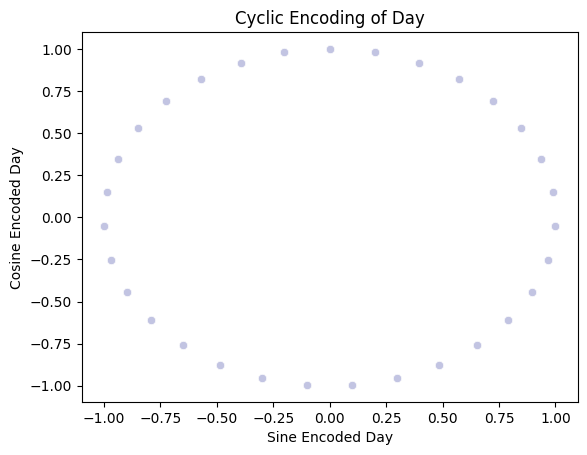

In [13]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data3, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [14]:
s = (data3.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

for i in object_cols:
    data3[i].fillna(data3[i].mode()[0], inplace=True)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [22]:
t = (data3.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

for i in num_cols:
    data3[i].fillna(data3[i].median(), inplace=True)
    
data3.info()

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-n

In [16]:
label_encoder = LabelEncoder()
for i in object_cols:
    data3[i] = label_encoder.fit_transform(data3[i])
    
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [23]:
features = data3.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) 
target = data3['RainTomorrow']

col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


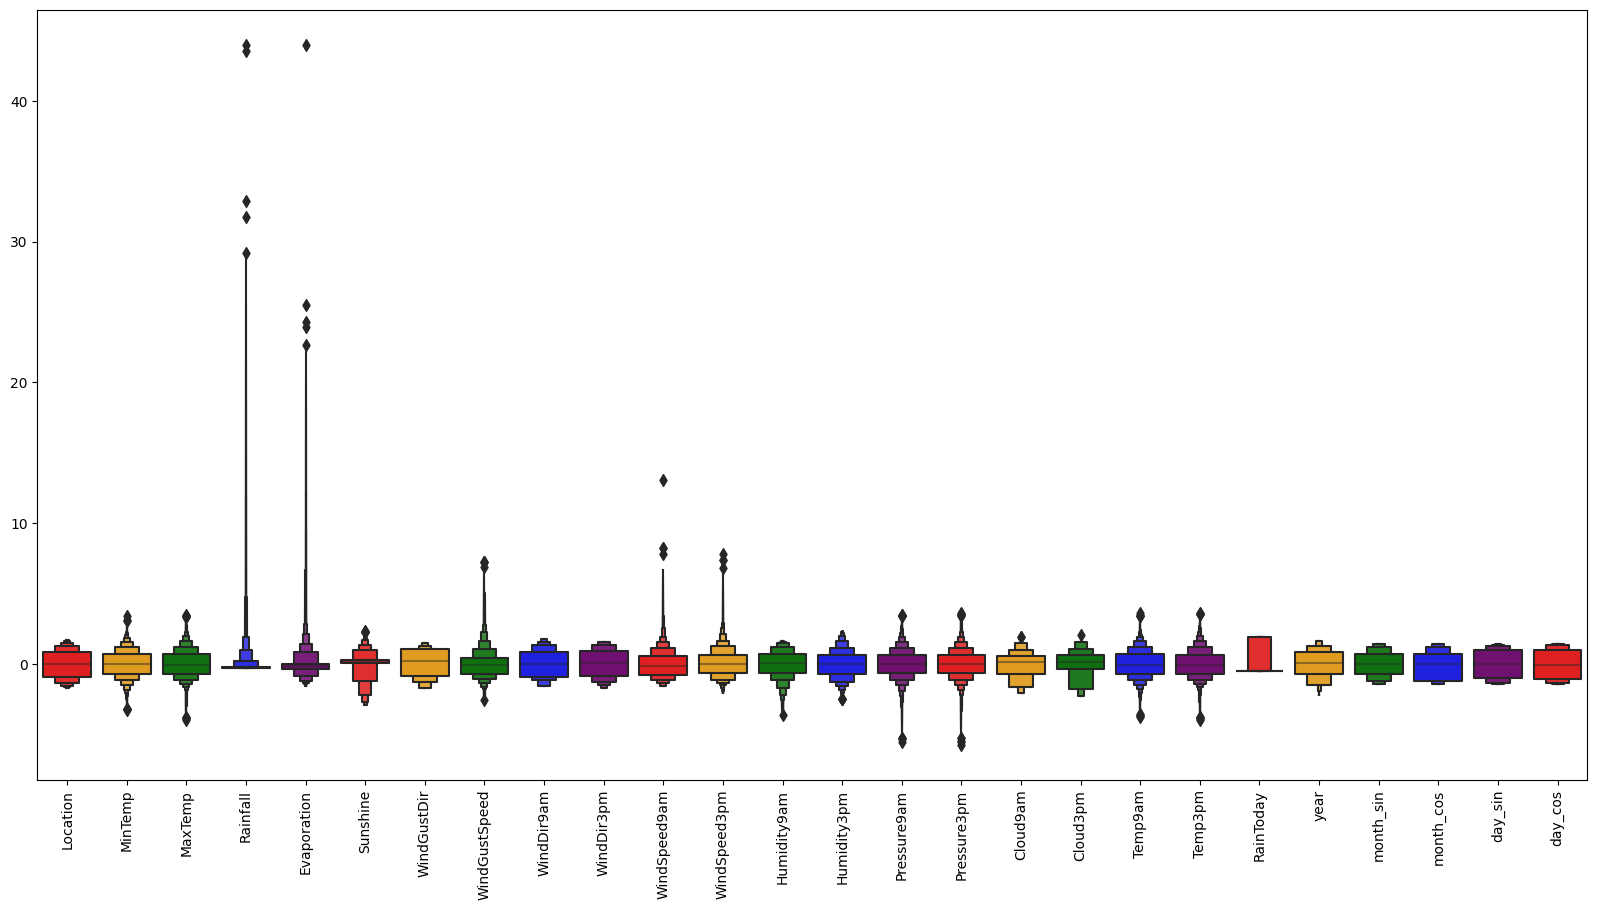

In [24]:
colours = ["RED", "ORANGE", "GREEN", "BLUE", "PURPLE"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [25]:
features.shape

(145460, 26)

In [27]:
features["RainTomorrow"] = target
means = features.mean()
stds = features.std()

In [28]:
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month_sin,month_cos,day_sin,day_cos,RainTomorrow
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.137693,-0.013506,0.019135,-0.529795,-1.879575,0.700845,1.236770,0.911938,-1.066146,0
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.137693,0.033011,0.384064,-0.529795,-1.879575,1.219437,0.720014,0.911938,-1.066146,0
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,-1.286294,0.622225,0.223495,-0.529795,-1.879575,1.409254,0.014112,0.911938,-1.066146,0
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.137693,0.172562,0.705202,-0.529795,-1.879575,1.219437,-0.691790,0.911938,-1.066146,0
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.561680,0.126045,1.172312,-0.529795,-1.879575,0.700845,-1.208546,0.911938,-1.066146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,0.137693,-1.067887,0.106718,-0.529795,1.666978,-0.007564,-1.397692,-1.261458,-0.612175,0
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,0.137693,-0.943842,0.413259,-0.529795,1.666978,-0.007564,-1.397692,-1.360046,-0.341613,0
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,0.137693,-0.695753,0.646814,-0.529795,1.666978,-0.007564,-1.397692,-1.403031,-0.056419,0
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-1.286294,-0.292607,0.632217,-0.529795,1.666978,-0.007564,-1.397692,-1.388654,0.231732,0


In [29]:
for column in col_names:
    lower_bound = means[column] - 3 * stds[column]
    upper_bound = means[column] + 3 * stds[column]
    features = features[(features[column] >= lower_bound) & (features[column] <= upper_bound)]

features.shape

(136501, 27)

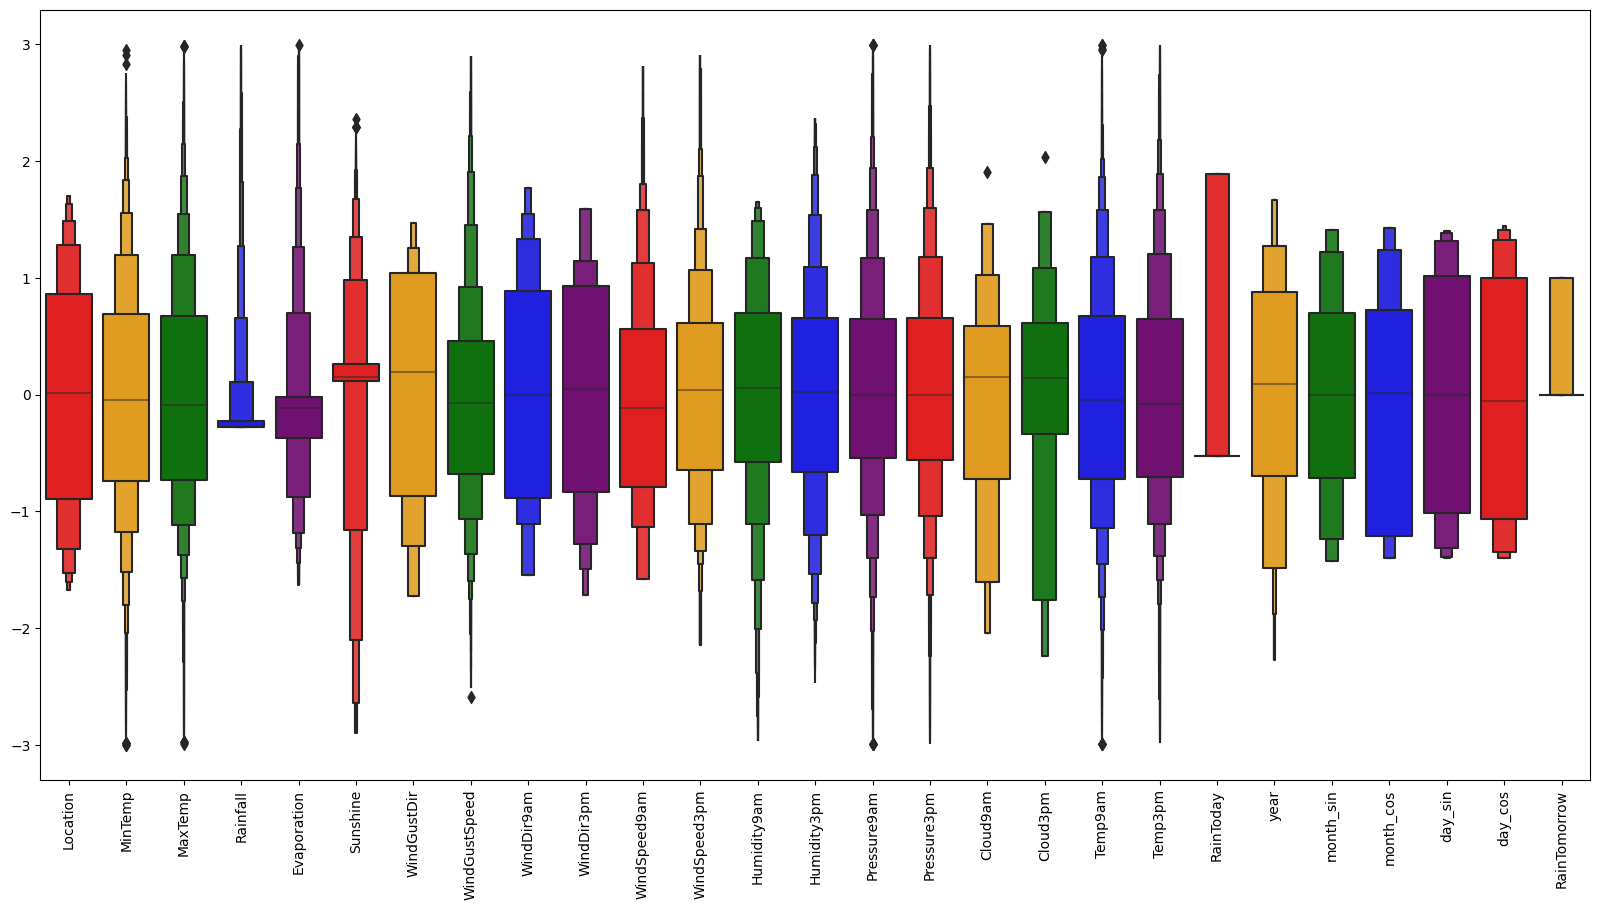

In [30]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [31]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(136501, 26)

In [32]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True,
)

In [35]:
model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2730/2730 [==============================] - 8s 3ms/step - loss: 0.4675 - accuracy: 0.7951 - val_loss: 0.3804 - val_accuracy: 0.7922
Epoch 2/150
2730/2730 [==============================] - 8s 3ms/step - loss: 0.4081 - accuracy: 0.8152 - val_loss: 0.3730 - val_accuracy: 0.8460
Epoch 3/150
2730/2730 [==============================] - 7s 3ms/step - loss: 0.4019 - accuracy: 0.8204 - val_loss: 0.3675 - val_accuracy: 0.8482
Epoch 4/150
2730/2730 [==============================] - 7s 3ms/step - loss: 0.3984 - accuracy: 0.8204 - val_loss: 0.3626 - val_accuracy: 0.8507
Epoch 5/150
2730/2730 [==============================] - 7s 3ms/step - loss: 0.3942 - accuracy: 0.8262 - val_loss: 0.3597 - val_accuracy: 0.8491
Epoch 6/150
2730/2730 [==============================] - 7s 2ms/step - loss: 0.3911 - accuracy: 0.8350 - val_loss: 0.3564 - val_accuracy: 0.8517
Epoch 7/150
2730/2730 [==============================] - 7s 2ms/step - loss: 0.3902 - accuracy: 0.8353 - val_loss: 0.3552 - val_ac

In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

854/854 [==============================] - 1s 854us/step


<Axes: >

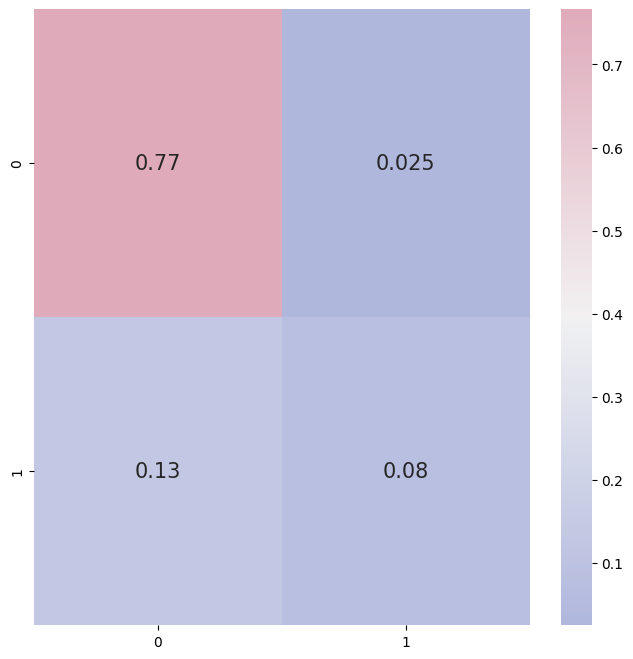

In [38]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     21610
           1       0.76      0.38      0.51      5691

    accuracy                           0.85     27301
   macro avg       0.81      0.67      0.71     27301
weighted avg       0.84      0.85      0.83     27301



# KNN imputer

In [175]:
data = pd.read_csv("data.csv")

In [176]:
data=data.iloc[:,1:]
data.info()
names=data.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [177]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

In [178]:
import pandas as pd
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5) 
data_imputed = knn_imputer.fit_transform(data)

In [180]:
df3=pd.DataFrame(data_imputed,columns=names)

In [181]:
df3.to_csv('4_knnimputer.csv')

In [2]:
df3=pd.read_csv('4_knnimputer.csv')

In [223]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     145460 non-null  int64  
 1   Location       145460 non-null  float64
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  float64
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  float64
 10  WindDir3pm     145460 non-null  float64
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [224]:
df3.shape

(145460, 23)

In [3]:
features=df3
features=features.iloc[:,1:]

In [ ]:

means = features.mean()
stds = features.std()


for column in names:
    lower_bound = means[column] - 3 * stds[column]
    upper_bound = means[column] + 3 * stds[column]
    features = features[(features[column] >= lower_bound) & (features[column] <= upper_bound)]

features.shape

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [6]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X.shape

(145460, 21)

# Random forest

In [230]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [231]:
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8600706979542719


# SVM

In [233]:
clf = SVC(kernel="poly", degree=3)

In [235]:
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [236]:
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
accuracy

0.8441636582430806

# Logistic

In [240]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Dhiyanesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [241]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(accuracy)

0.8454798435619735


# KNN

In [243]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [244]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(accuracy)

0.842208182912154


<h1>Naive bayes</h1>


In [1]:
from sklearn.naive_bayes import GaussianNB

In [8]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [9]:
accuracy = np.mean(y_pred == y_test)
print(accuracy)

0.7847174480956964
